In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

In [68]:
df = sm.datasets.macrodata.load_pandas().data

In [69]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [70]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [71]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))

In [72]:
df.index = index

In [73]:
df.head(10)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19
1960-06-30,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.55,140.2,2.68,5.2,180.671,0.14,2.55
1960-09-30,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.75,140.9,2.36,5.6,181.528,2.70,-0.34
1960-12-31,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.84,141.1,2.29,6.3,182.287,1.21,1.08
1961-03-31,1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.81,142.1,2.37,6.8,182.992,-0.40,2.77
1961-06-30,1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.92,142.9,2.29,7.0,183.691,1.47,0.81


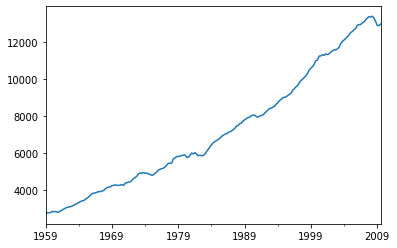

In [74]:
df['realgdp'].plot();

In [75]:
result = sm.tsa.filters.hpfilter(df['realgdp'])

In [76]:
type(result)

tuple

In [77]:
result[0]

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
                 ...    
2008-09-30    102.018455
2008-12-31   -107.269472
2009-03-31   -349.047706
2009-06-30   -397.557073
2009-09-30   -333.115243
Name: realgdp_cycle, Length: 203, dtype: float64

In [78]:
result[1]

1959-03-31     2670.837085
1959-06-30     2698.712468
1959-09-30     2726.612545
1959-12-31     2754.612067
1960-03-31     2782.816333
                  ...     
2008-09-30    13222.581545
2008-12-31    13249.189472
2009-03-31    13274.457706
2009-06-30    13299.061073
2009-09-30    13323.456243
Name: realgdp_trend, Length: 203, dtype: float64

In [79]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])

In [80]:
df['trend'] = gdp_trend

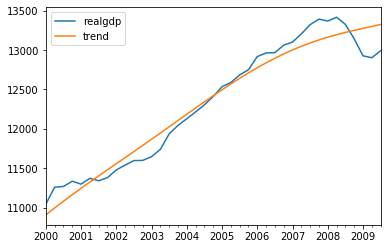

In [81]:
df[['realgdp','trend']]['2000-03-31':].plot();

### EWMA Code Along

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month')

In [84]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [85]:
airline.dropna(inplace=True)

In [86]:
airline.index = pd.to_datetime(airline.index)

In [87]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [88]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [89]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [90]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

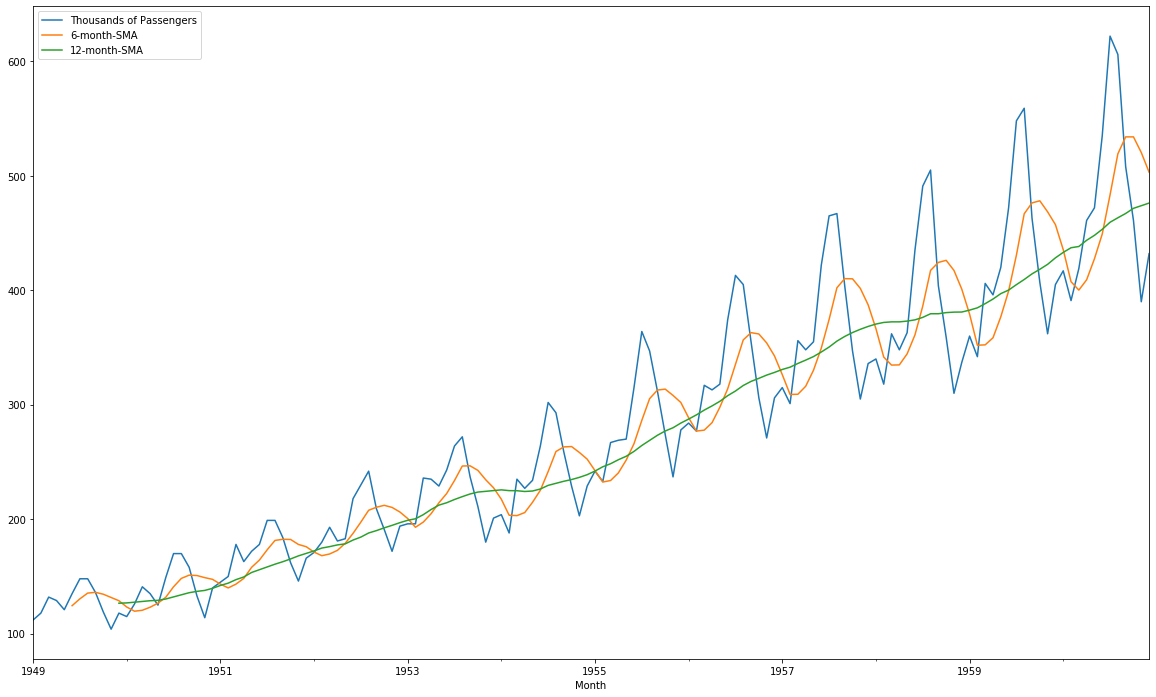

In [91]:
airline.plot(figsize=(20,12));

In [92]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

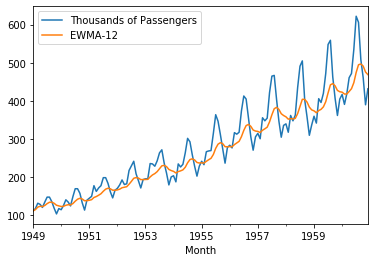

In [93]:
airline[['Thousands of Passengers','EWMA-12']].plot();

#### ETS Code Along

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month')

In [96]:
airline.head(4)

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0


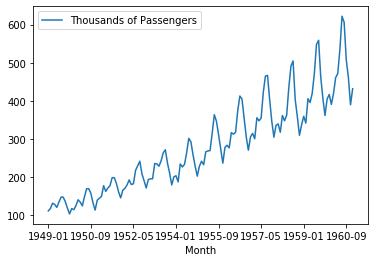

In [97]:
airline.plot();

In [98]:
airline.dropna(inplace=True)

In [99]:
airline.index = pd.to_datetime(airline.index)

In [100]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [102]:
result = seasonal_decompose(airline['Thousands of Passengers'],'model=multiplicative')

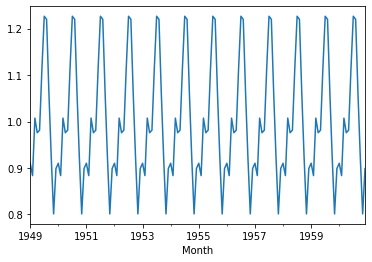

In [103]:
result.seasonal.plot();

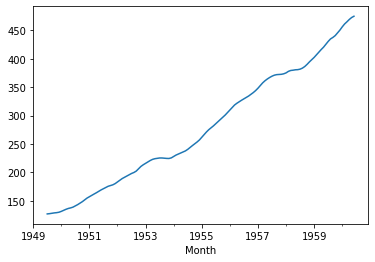

In [104]:
result.trend.plot();

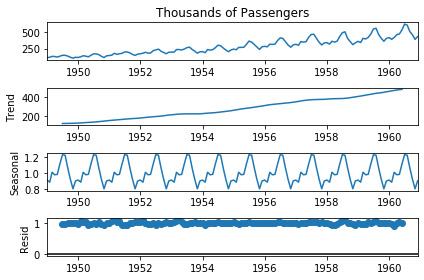

In [105]:
result.plot();

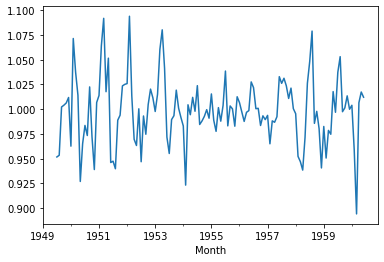

In [106]:
result.resid.plot()

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
import statsmodels.api as smr

In [109]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [110]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [111]:
df.columns = ['Month','Milk in Pound per Cow']

In [112]:
df.head()

,Month,Milk in Pound per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [113]:
df.tail()

,Month,Milk in Pound per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [114]:
df.drop(168,axis=0,inplace=True)

In [115]:
df.tail()

,Month,Milk in Pound per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [116]:

df['Month'] = pd.to_datetime(df['Month'])

In [117]:
df.head()

,Month,Milk in Pound per Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [118]:
df.set_index('Month',inplace=True)

In [119]:
df.head()

,Milk in Pound per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [121]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [124]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pound per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


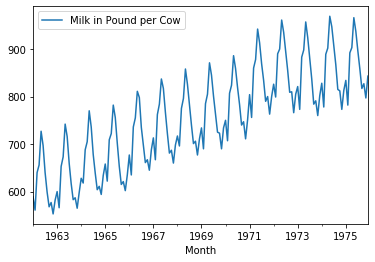

In [125]:
df.plot();

In [127]:
time_series = df['Milk in Pound per Cow']

In [128]:
type(time_series)

pandas.core.series.Series

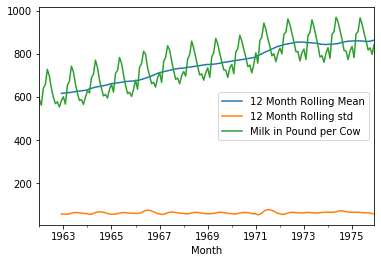

In [138]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling std')
time_series.plot()
plt.legend();

###  ETS Decomposition plot

In [140]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [150]:
dcomp = seasonal_decompose(time_series,freq=12)

C:\Users\Bright\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


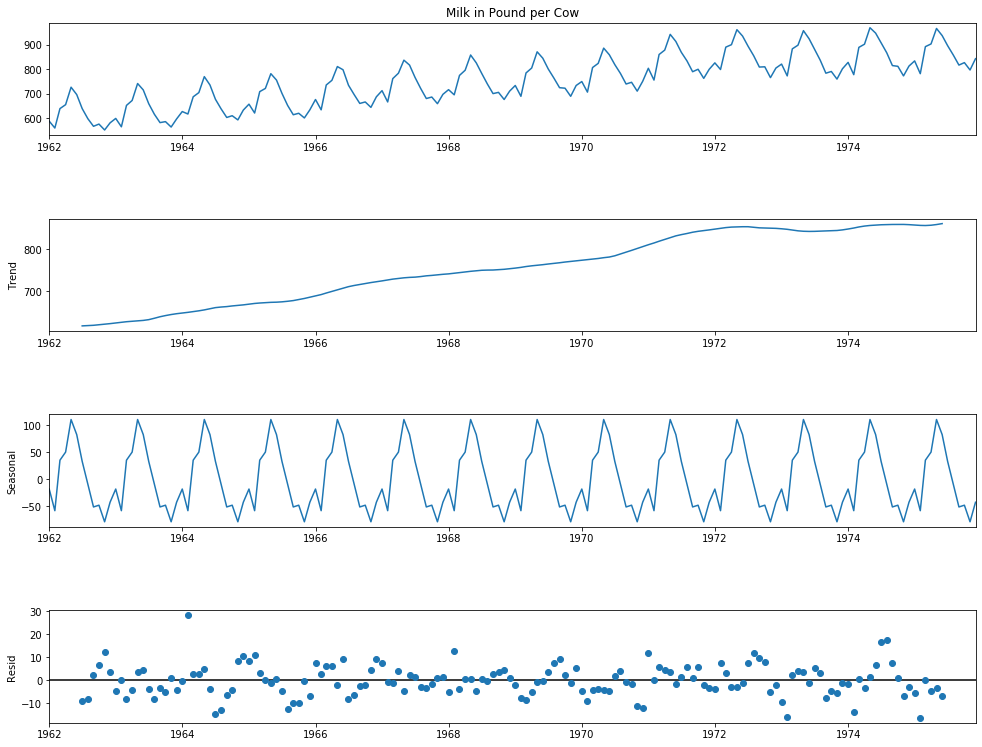

In [151]:
fig = dcomp.plot()
fig.set_size_inches(15,12);

### Test For Stationarity

In [152]:
df.head()

,Milk in Pound per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [154]:
from statsmodels.tsa.stattools import adfuller

In [157]:
result = adfuller(df['Milk in Pound per Cow'])

result

(-1.3038115874221285,
 0.6274267086030321,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [159]:
def adf_check(time_series):
    result = adfuller(time_series)
    print("Argumented Dicky-Fuller Test")
    labels = ['ADF Test Statistic', 'p-value','# of lags','Num of Observations used']
    
    for value,label in zip(result,labels):
        print(label+ " : " +str(value))
        
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit roots and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root, it is non-stationery")

In [162]:
adf_check(df['Milk in Pound per Cow'])

Argumented Dicky-Fuller Test
ADF Test Statistic : -1.3038115874221285
p-value : 0.6274267086030321
# of lags : 13
Num of Observations used : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationery


In [164]:
df['First Difference'] = df['Milk in Pound per Cow'] - df['Milk in Pound per Cow'].shift(1)

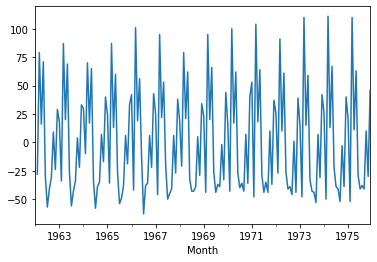

In [166]:
df['First Difference'].plot();

In [168]:
adf_check(df['First Difference'].dropna())

Argumented Dicky-Fuller Test
ADF Test Statistic : -3.0549955586530886
p-value : 0.030068004001784155
# of lags : 14
Num of Observations used : 152
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit roots and is stationary


In [169]:
df['Milk Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

In [170]:
adf_check(df['First Difference'].dropna())

Argumented Dicky-Fuller Test
ADF Test Statistic : -3.0549955586530886
p-value : 0.030068004001784155
# of lags : 14
Num of Observations used : 152
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit roots and is stationary


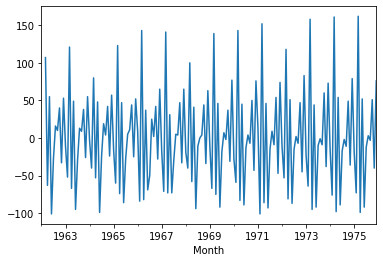

In [171]:
df['Milk Second Difference'].plot();

In [172]:
df['Seasonal Difference'] =  df['Milk in Pound per Cow'] - df['Milk in Pound per Cow'].shift(12)

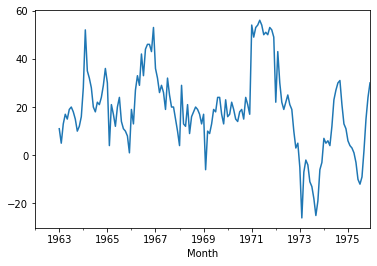

In [173]:
df['Seasonal Difference'].plot();

In [175]:
adf_check(df['Seasonal Difference'].dropna())

Argumented Dicky-Fuller Test
ADF Test Statistic : -2.3354193143593966
p-value : 0.16079880527711388
# of lags : 12
Num of Observations used : 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationery


In [176]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

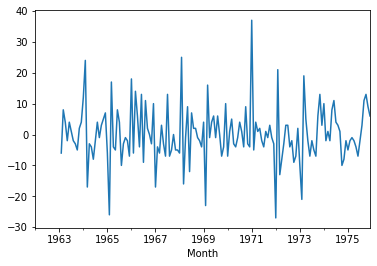

In [177]:
df['Seasonal First Difference'].plot();

In [178]:
adf_check(df['Seasonal First Difference'].dropna())

Argumented Dicky-Fuller Test
ADF Test Statistic : -5.038002274921981
p-value : 1.865423431878848e-05
# of lags : 11
Num of Observations used : 143
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit roots and is stationary


### Auto correlation plot

In [180]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

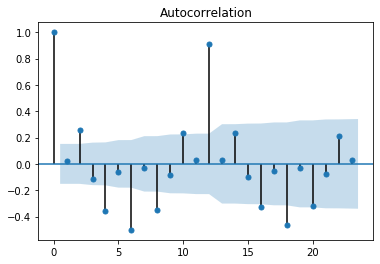

In [181]:
fig_first = plot_acf(df['First Difference'].dropna())

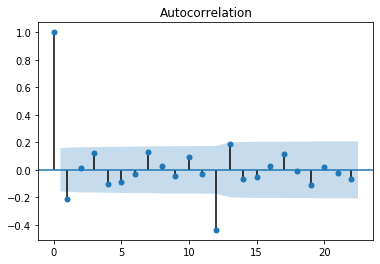

In [182]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

In [183]:
from pandas.plotting import autocorrelation_plot

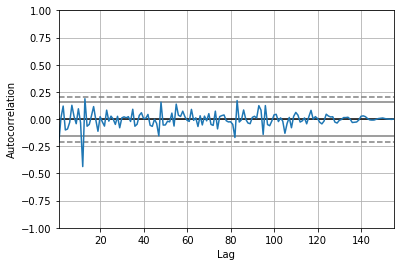

In [185]:
autocorrelation_plot(df['Seasonal First Difference'].dropna());

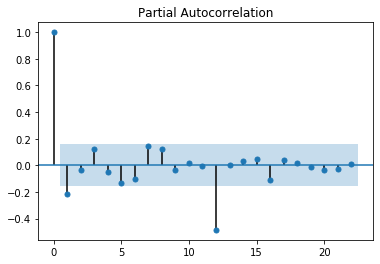

In [187]:
plot_pacf(df['Seasonal First Difference'].dropna());

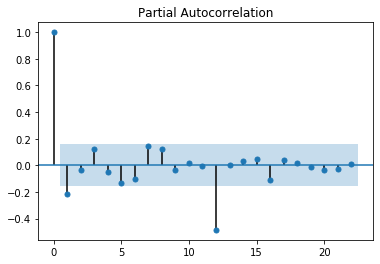

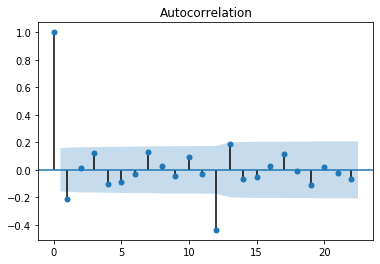

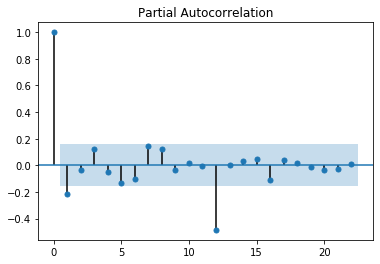

In [188]:
plot_acf(df['Seasonal First Difference'].dropna())
plot_pacf(df['Seasonal First Difference'].dropna())

###  The seasonal arima project

In [190]:
from statsmodels.tsa.arima_model import ARIMA   

In [191]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |

In [193]:
model = sm.tsa.statespace.SARIMAX(df['Milk in Pound per Cow'],order=(0,1,0),seasonal_order=(1,1,1,12))

C:\Users\Bright\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Bright\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [194]:
results = model.fit()

In [195]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                Milk in Pound per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Thu, 21 May 2020   AIC                           1074.131
Time:                                      16:33:37   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

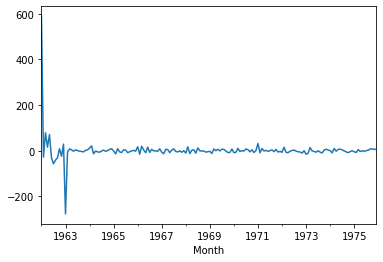

In [198]:
results.resid.plot();

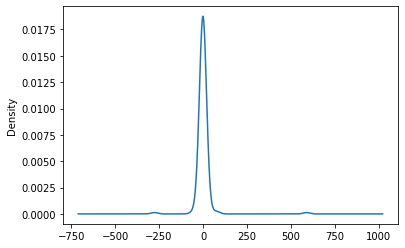

In [201]:
results.resid.plot(kind='kde');

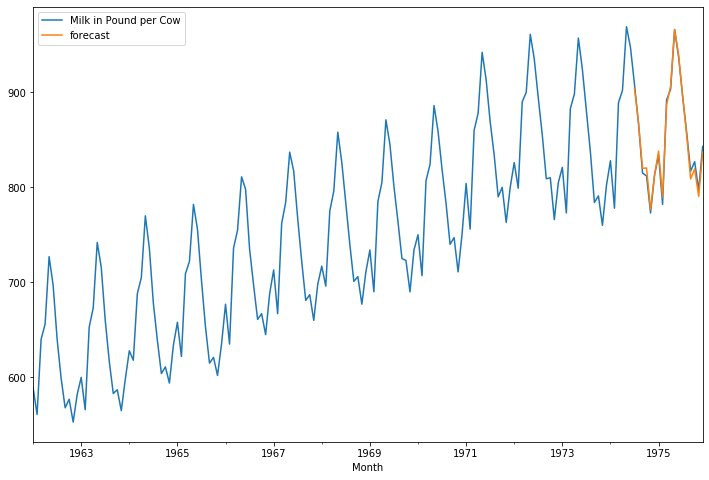

In [202]:
df['forecast'] = results.predict(start=150, end=168)
df[['Milk in Pound per Cow', 'forecast']].plot(figsize=(12,8))


In [203]:
df.tail()

,Milk in Pound per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358648
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841372
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323185
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427530
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063622


In [205]:
from pandas.tseries.offsets import DateOffset

In [206]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,24)]

In [207]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [208]:
future_df = pd.DataFrame(index=future_dates,columns=df.columns)

In [209]:
future_df

,Milk in Pound per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
final_df =pd.concat([df,future_df])

In [211]:
final_df.tail()

,Milk in Pound per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
df['forecast'] = results.predict(start=168,end=192)

In [214]:
final_df.tail()

,Milk in Pound per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


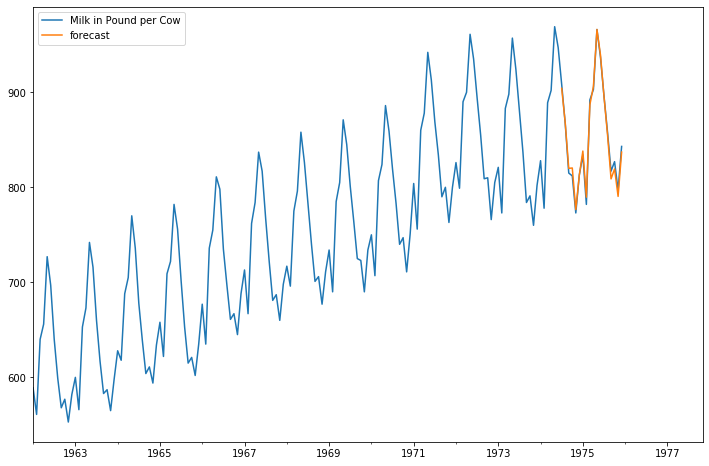

In [222]:
final_df[['Milk in Pound per Cow','forecast']].plot(figsize=(12,8));